# Providing data-driven suggestions for HR

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.


In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Guide Questions
- Who are your stakeholders for this project? 
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage? 


### Step 1: Imports
- Import packages
- Load dataset

In [5]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For displaying all columns
pd.set_option('display.max_columns', None)

# For data modelling

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# For metrics and helpful functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

#### Load dataset

In [7]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Step 2: Exploratory Data Analysis
- Understand variables
- Clean the dataset

In [9]:
# Gather basic info about data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
# Basic summary
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
# Display all columns
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [15]:
# Rename columns
df0 = df0.rename(columns={'Work_accident': 'work_accident', 
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

df0.columns                          

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### Check missing variables

In [17]:
# Check missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There is no missing value in the dataset.

#### Check for duplicates

In [19]:
df0.duplicated().sum()

3008

3,008 rows contain duplicates (20% of the data)

In [21]:
# Inspect rows with duplicates

df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The above output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response? Likelihood analysis using Bayes' Theorem could be applied to check, but this does not seem necessary. It is unlikely that two employees obtain the same entries given that the variables are continuous. Thus, dropping duplicates is justifiable.

In [23]:
# Drop duplicates
df1 = df0.drop_duplicates(keep='first')

# Display first rows
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Check for outliers

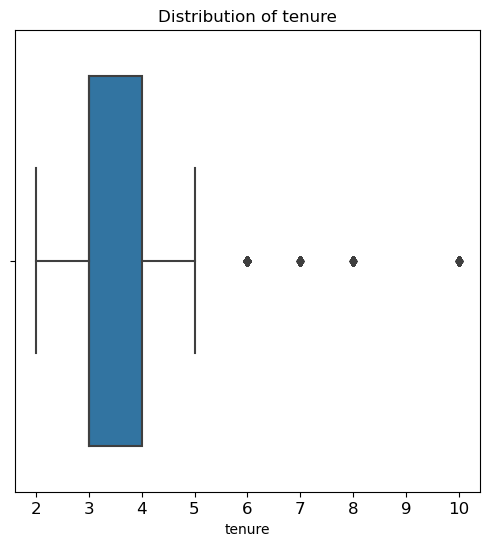

In [25]:
# Create a boxplot to visualize 'tenure' and detect outliers
plt.figure(figsize=(6,6))
plt.title('Distribution of tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [59]:
# Check number of rows containing outliers in tenure

# Compute the 25th percentile
p25 = df1['tenure'].quantile(0.25)

# Compute the 75# percentile
p75 = df1['tenure'].quantile(0.75)

# Solve for IQR
iqr = p75 - p25

# Define fences
upper_limit = p75 + 1.5*iqr
lower_limit = p25 - 1.5*iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count the rows with outliers
print('The number of rows with outliers is ', len(outliers))

Lower limit: 1.5
Upper limit: 5.5
The number of rows with outliers is  824


#### Check number of people who left

In [27]:
# Count people who left
print(df1['left'].value_counts())

# Get the percentage of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


10,000 (83.4%) stayed while 1,991 (16.6%) left.

#### Data Visualization

We can create a stacked boxplot showing `average_monthly_hours` distributions for `number of project`, comparing the distributions of employees who stayed versus those who left.

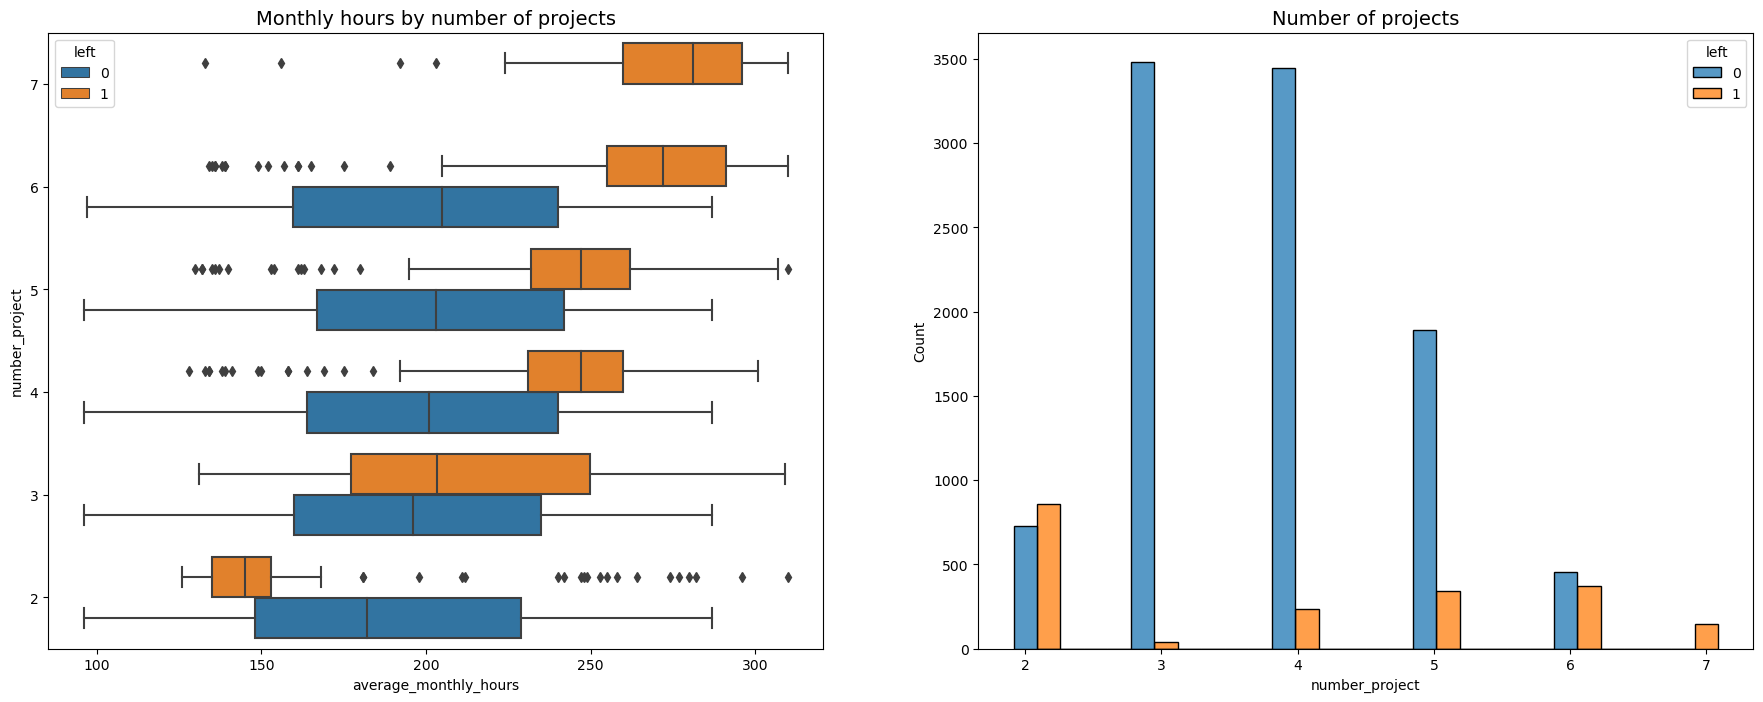

In [29]:
# Create a plot

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create a boxplot showing 'avarage_monthly_hours' for 'number_project'
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Creating histogram showing distribution of 'number_project'
tenure_stay = df1[df1['left']==0]['number_project']
tenure_stay = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects', fontsize='14')

plt.show()

It comes natural that people who work on several projects will have higher average monthly hours. We can see that the people who left may be those who work more than their peers or less. Those who worked more may have felt under extreme stress or dissatisfaction while those who worked less may have been fired. All those who worked on 7 projects left. We can see that with 3 or 4 projects, the possibility of leaving is less. On average, employees are working just 166.67 hours per month if we consider 40 hours per week and two weeks of vacation. It is evident from the median of all boxplots that employees are working more hours than they should be. It simply means that employees at Salifort Motors are overworked.

In [31]:
# Confirm that all employees with 7 projects left
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

Since there is no count for those stayed, it is confirmed that all employees working on 7 projects left.

Examine the average monthly hours vs. satisfaction levels.

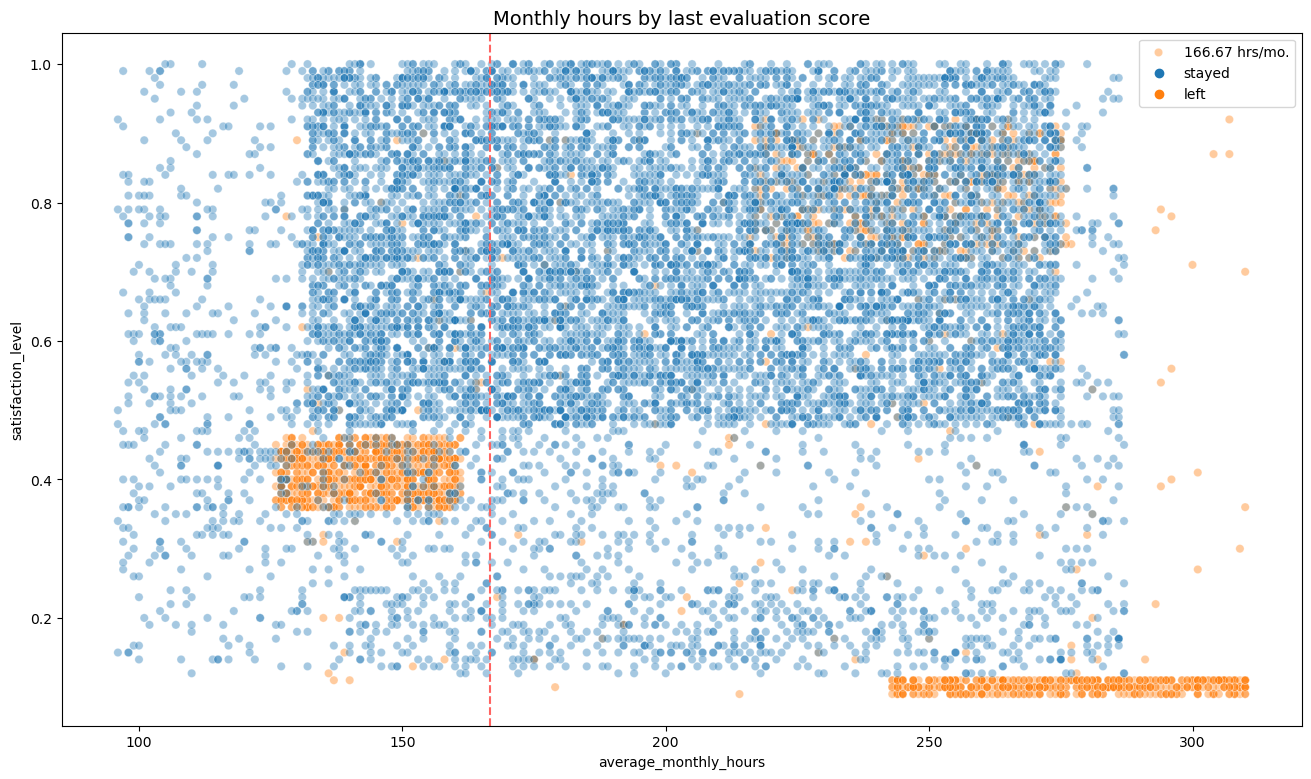

In [33]:
# Create a scatterplot
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)

# Plot the reference line for the mean monthly hours
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs/mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

plt.show()

We can see a dense region of those who left working at around 240-315 hours per month. That is way beyond the normal working hours. This might be the reason why their satisfaction level is close to zero.

Another visible group of people who left are those working less. Their satisfaction level is around 0.4. HR could speculate on their reason for leaving. It could be peer pressure or they were fired.

Lastly, there is a group of people working around 210-280 hours per month. As you can see, there is incoherence around that area. It could indicate falsification of data.

Let's examine tenure vs. satisfaction level.

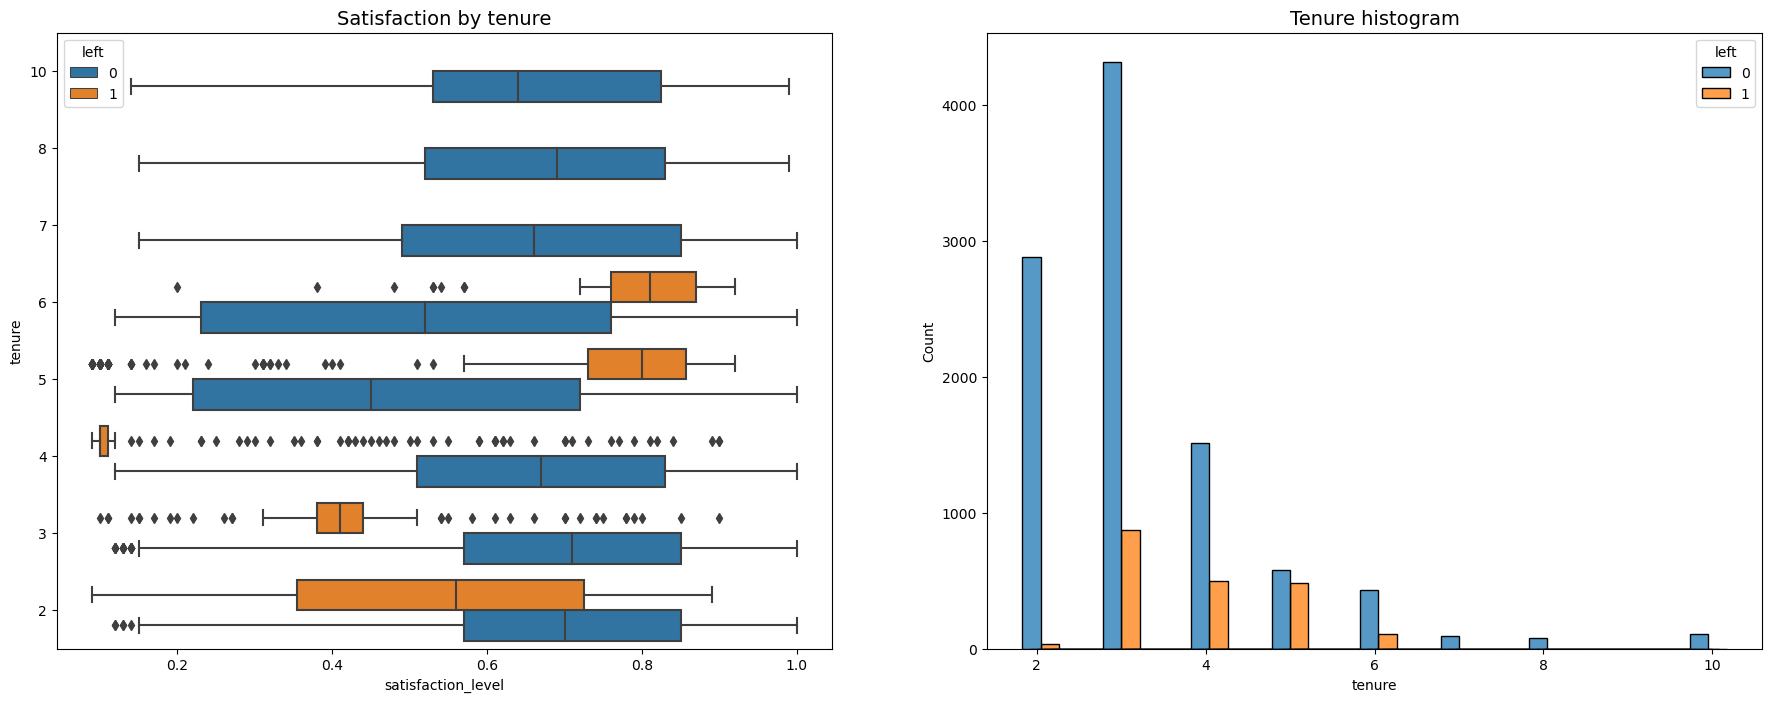

In [35]:
# Create boxplot
fig, ax = plt.subplots(1,2,figsize=(22,8))

# Create boxplot
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [37]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. This means that most of those who stayed have higher  satisfaction levels.

Next, you could examine salary levels for different tenures.

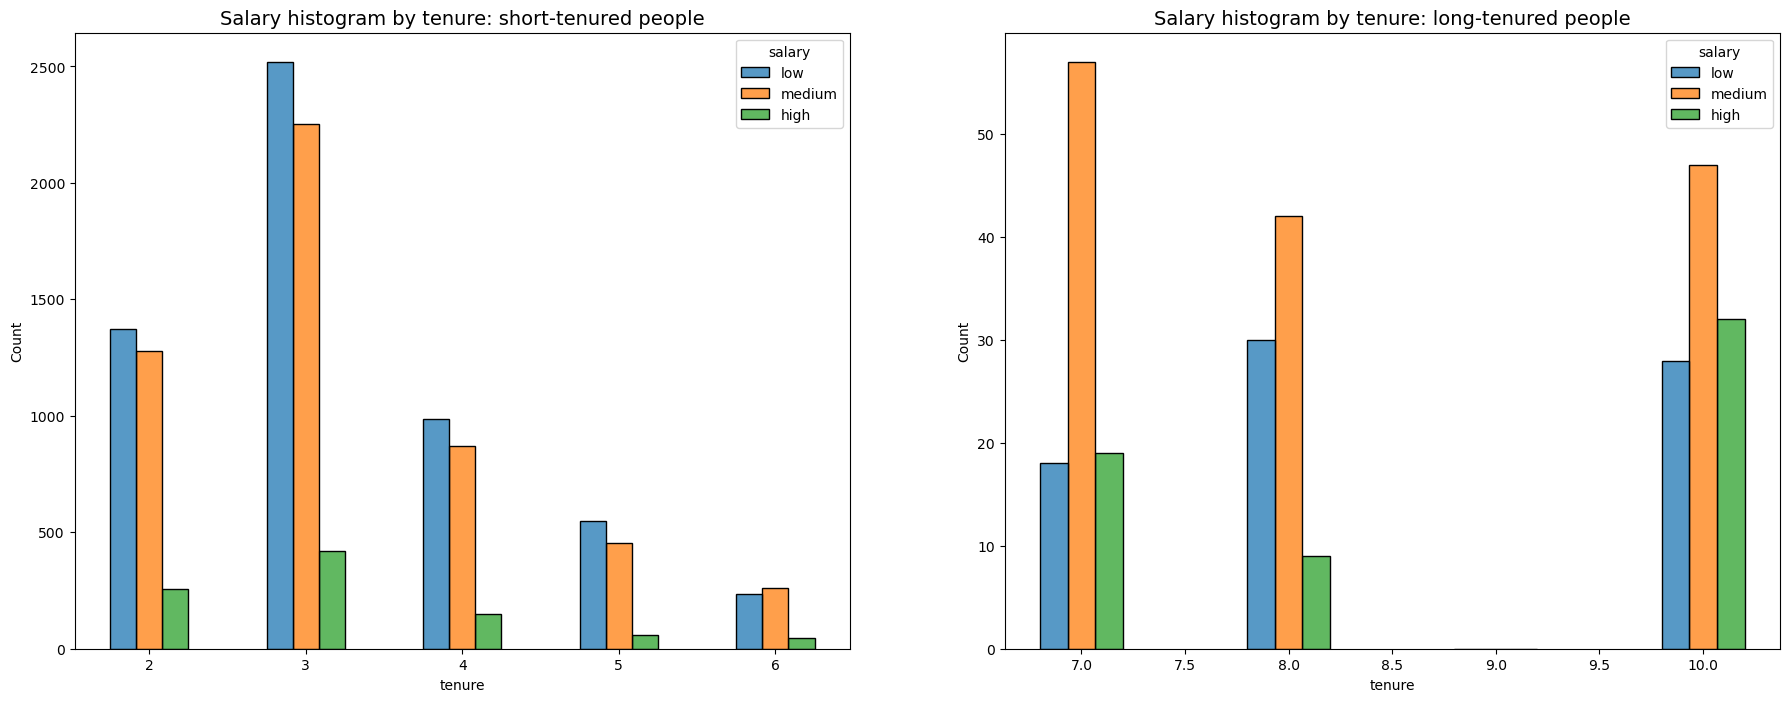

In [39]:
# Set figure and axes
fig, ax = plt.subplots(1,2,figsize=(22,8))

# Define short- and long-tenured employees
tenure_short = df1[df1['tenure']<7]
tenure_long = df1[df1['tenure']>6]

# Plot short-tenured histograms
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots show that long-tenured employees are not disproportionately comprised of higher-paid employees.

Now, let's explore the relationship between the average_monthly_hours and last_evaluation.

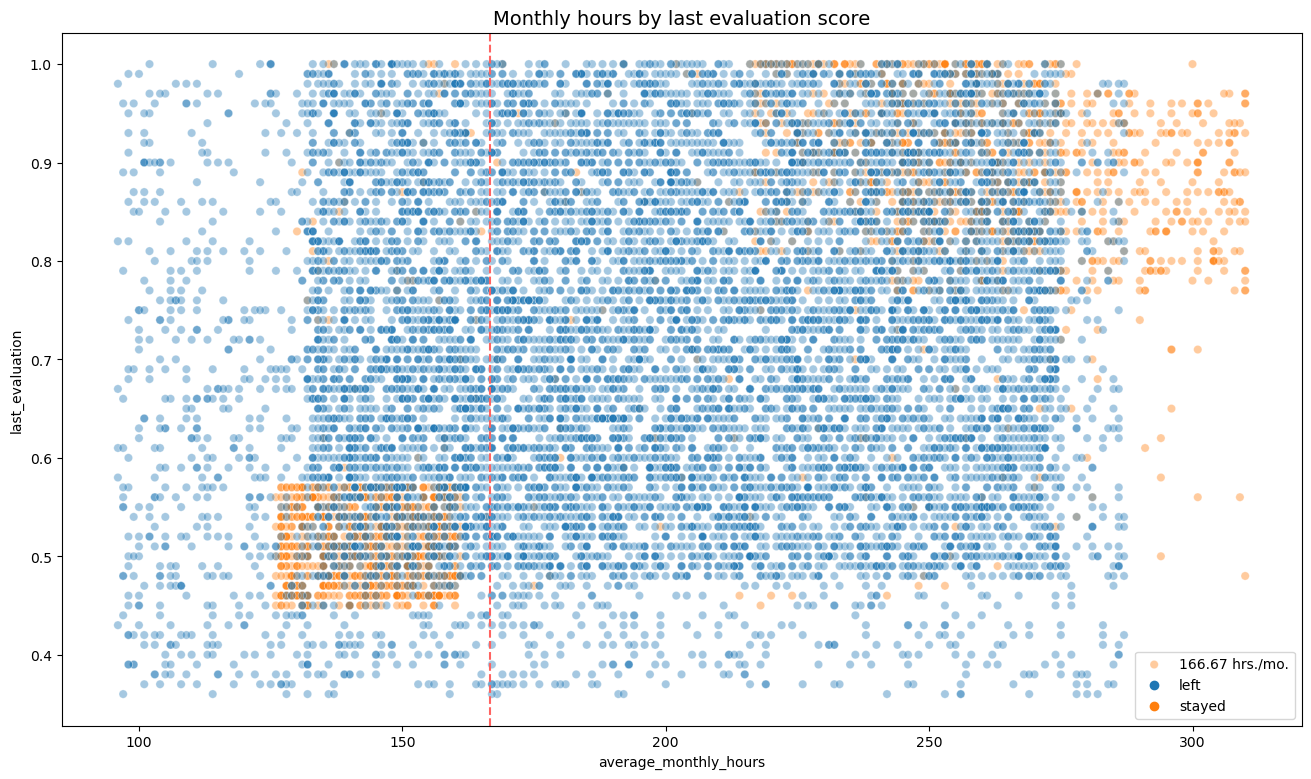

In [41]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot shows that there are two groups of people who left, those who were overworked but performed well and those who work below the mean monthly hours and received low evaluations. 

Next is to examine whether employees who worked very long hours were promoted in the last five years.

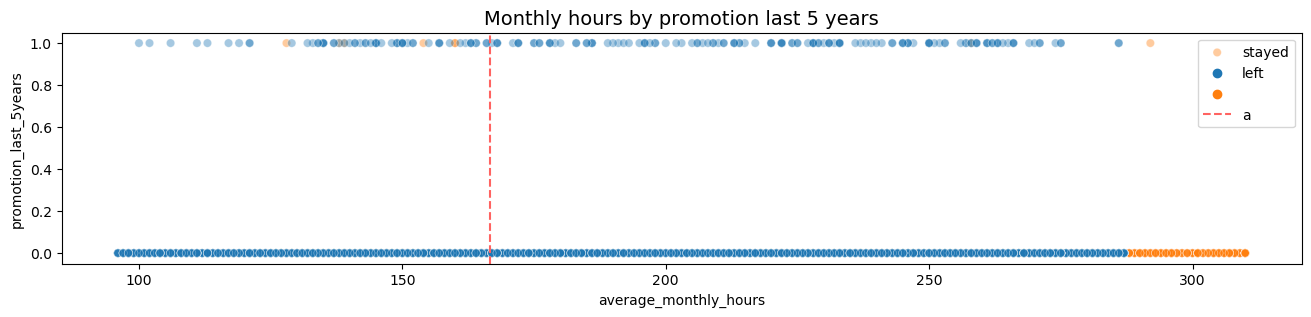

In [42]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['stayed', 'left','','a'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot shows that very few employees who were promoted in the last five years left. Also, very few employees who worked long hours were promoted. We can see as well that a lot of those who left were employees who worked long hours were promoted. This could be a reason for their leaving.

Next, we can inspect how the employees who left are distributed across departments.

In [45]:
# Inspect the departments
df1['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

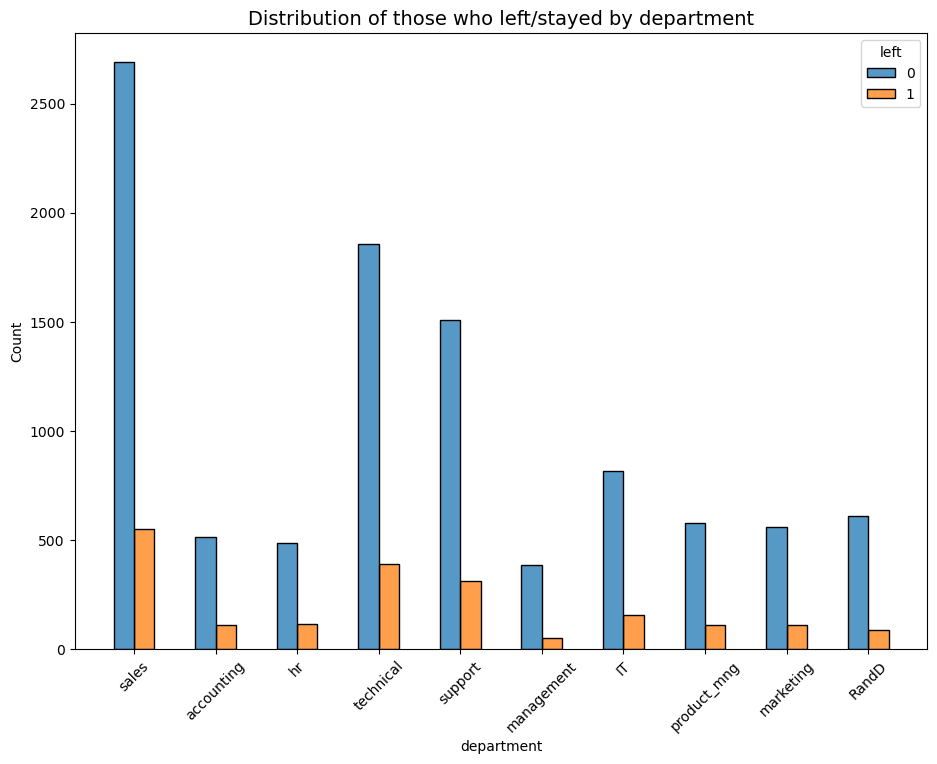

In [47]:
# Create histogram
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, hue_order=[0,1], multiple='dodge', shrink=0.5)
plt.xticks(rotation=45)
plt.title('Distribution of those who left/stayed by department', fontsize=14);

It seems that there is no significant insight you can obtain about the counts of those who left if we inspect the departments.

To end the EDA, we will implement a heat map to check if some variables are highly correlated.

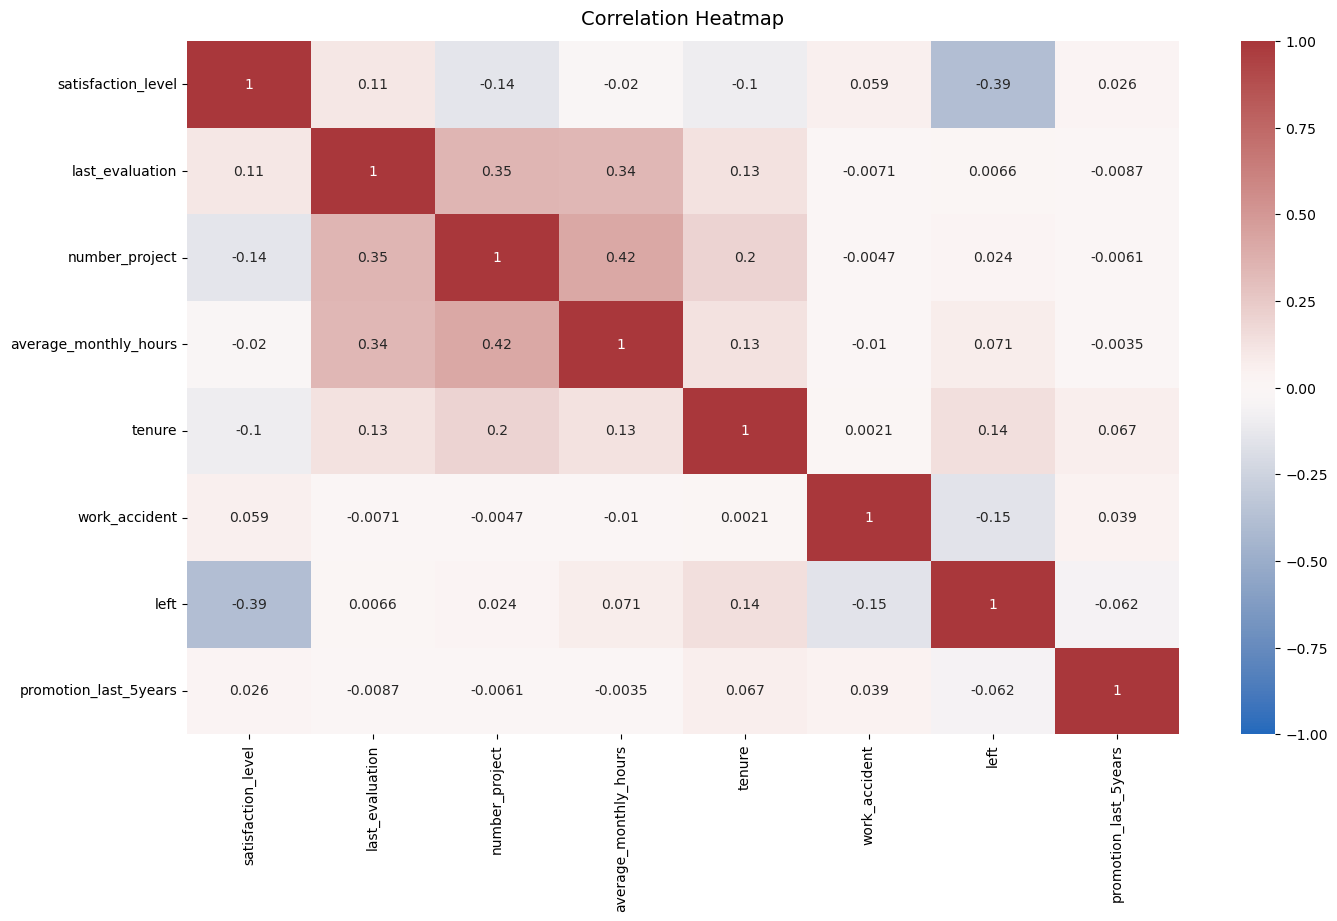

In [49]:
# Create your heat map
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores are positively correlated. We can also see that whether an employee leaves is negatively correlated with their satisfaction level.

#### Insights

It appears that the reason employees leave is due to poor management. Employees leave because they are working longer hours, doing many projects and unsatisfied with their jobs. It can also be inferred that their reasons for leaving is the fact that they working longer hours/handling many projects but did not receive promotions or good evaluation scores. A sizeable group of employees are burned out. It also appears that after 6 years of work, employees tend not to leave the company.

### Step 3: Modelling

In this project, we will implement three models to determine whether an employee will leave the company or not. These models are:
- Logistic Regression
- Random Forest
- XGBoost

#### Logistic Regression

Before we conduct the binary logistic regression, we need to convert the remaining non-numeric variables, `department` and `salary`.

`department` is categorical, so creating a dummy for modelling is fine. However, `salary`, although categorical, is ordinal. Thus, label encoding is more appropriate for this.

In [51]:
# Copy dataframe
df_numeric = df1.copy()

# Encode the salary
df_numeric['salary'] = (
    df_numeric['salary'].astype('category')
    .cat.set_categories(['low','medium','high'])
    .cat.codes
)

# Dummy the department
df_numeric = pd.get_dummies(df_numeric, drop_first=False,  dtype=int)

# Display the new dataframe
df_numeric.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Create a heatmap to visualize the correlated variables identified earlier.

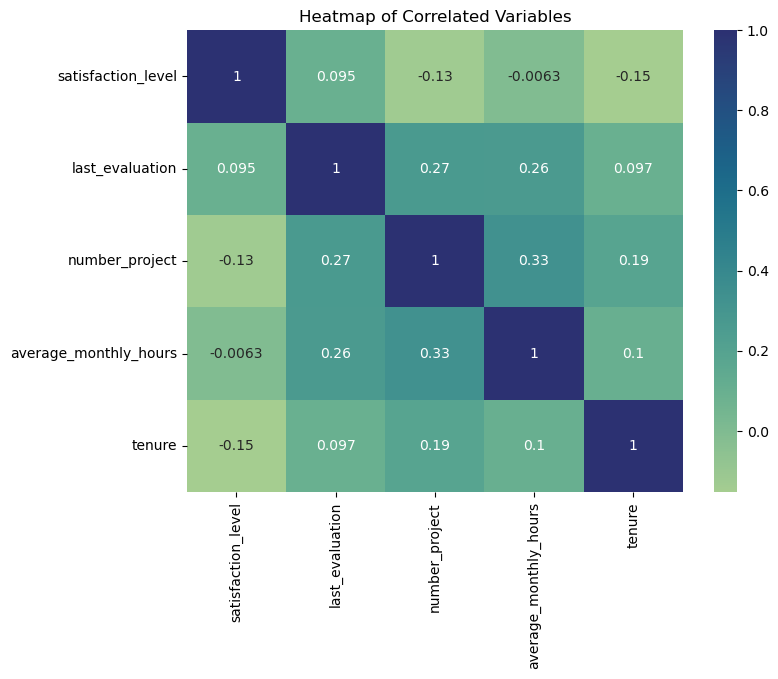

In [53]:
# Create heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), annot=True, cmap='crest')
plt.title('Heatmap of Correlated Variables')
plt.show()

Since logistic regression is sensitive to outliers, it would be a good idea to remove outliers in the tenure.

In [61]:
# Select rows with outliers
df_logreg = df_numeric[(df_numeric['tenure'] > lower_limit) & (df_numeric['tenure'] < upper_limit)]

# Display the first few rows
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Separate the variables

In [63]:
# Isolate outcome variable
y = df_logreg['left']

# Display y
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [65]:
# Isolate the predictor variables
X = df_logreg.drop('left', axis=1)

# Display the first few rows
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Split the data into training and testing set. Since 10,000 (83.4%) stayed while 1,991 (16.6%) left, we need to stratify y.

In [67]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Construct the logistic regression and fit to the training dataset.

In [160]:
# Construct the logistic regression classifier

log_clf = LogisticRegression(random_state=42, max_iter=500)
log_clf = log_clf.fit(X_train, y_train)

Test the classifier.

In [212]:
# Use the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to check the results.

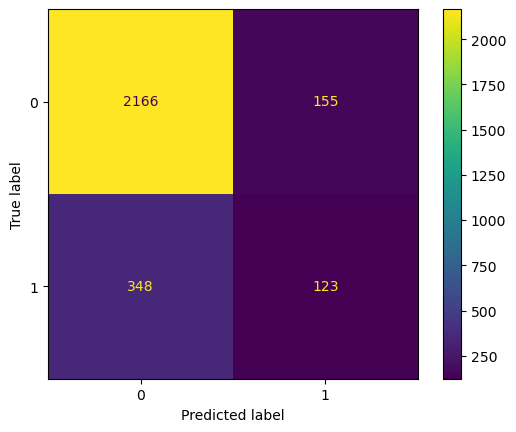

In [224]:
# Create confusion matrix for logistic regression
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Display the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot the confusion matrix
log_disp.plot(values_format='')
plt.show()

As you can see, the false positives and false negatives are greater than the true positives. 2166 of those who stayed were predicted to stay. We can evaluate this model using our metrics.

In [228]:
# Create a classification report for logistic regression
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The precision of the model is 79%, recall is 82%, F1 score is 80% and an accuracy of 82%. We can solve these figures without using the `classification_report` function.

In [220]:
# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Create DataFrame with evaluation metrics
logreg_results = pd.DataFrame({
    'model': ['logistic regression'],
    'precision': [precision],
    'recall': [recall],
    'f1': [f1],
    'accuracy': [accuracy],
    'auc': [auc]
})

logreg_results

,model,precision,recall,f1,accuracy,auc
0,logistic regression,0.442708,0.170683,0.246377,0.826551,0.563941


The model has lower performance when predicting employees who will leave.

#### Decision Tree

In [69]:
# Isolate the outcome variable
y = df_numeric['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [71]:
# Select the features
X = df_numeric.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [73]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

##### Decision Tree 1

In [168]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [170]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 4.54 s, sys: 2.08 ms, total: 4.54 s
Wall time: 4.57 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [172]:
# Check the best params
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [174]:
# Check best score
tree1.best_score_

0.969819392792457

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

We can extract all scores from the grid search.

In [186]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called
        model_objectL a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, auc

    Returns a pandas df with scores for the model with the best mean 'metric' score
    across all validation scores.
    '''

    # Create dictionary
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate row of best score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(),:]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [188]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,f1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


These metrics indicate high performance of a model. However, take note that decision trees are vulnerable to overfitting. We can avoid this by using a random forest.

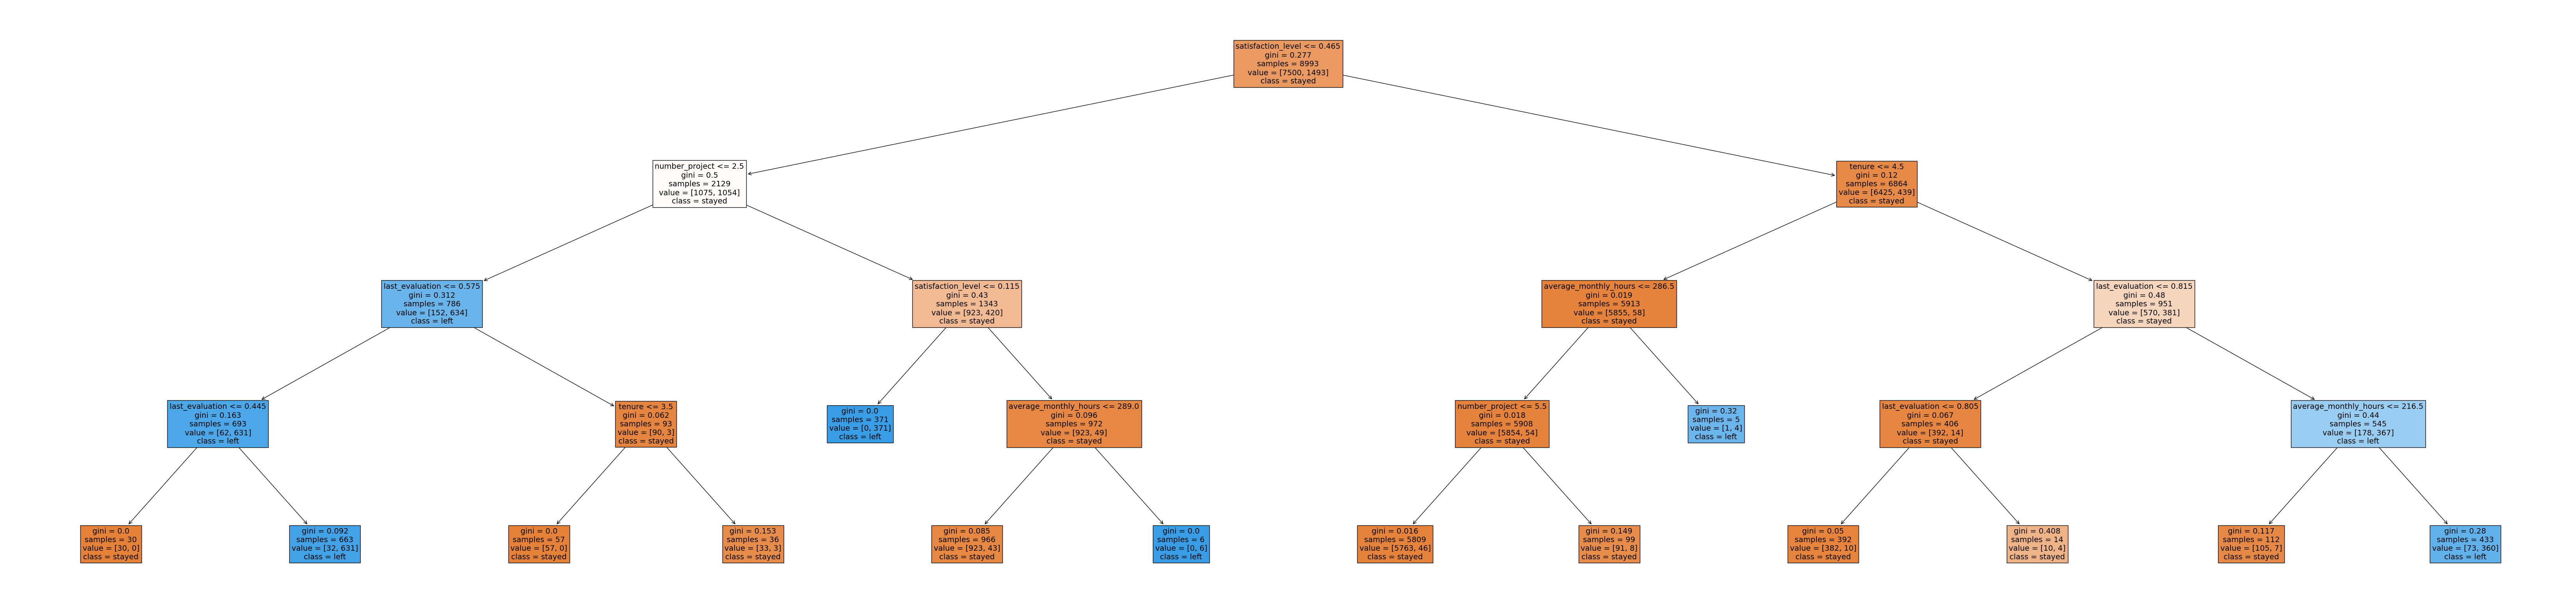

In [401]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns.tolist(), 
          class_names=['stayed', 'left'], filled=True)
plt.show()

In [405]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
satisfaction_level,0.524622
last_evaluation,0.178501
tenure,0.120792
number_project,0.117102
average_monthly_hours,0.058983


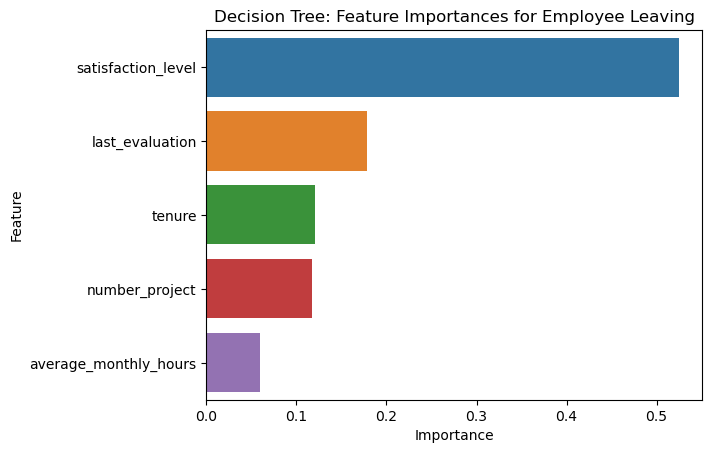

In [409]:
# Plot importance
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

We can see that satisfaction level contributes most in the model.

#### Random Forest

In [301]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [303]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 23min 49s, sys: 3.01 s, total: 23min 52s
Wall time: 1h 3min 32s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [79]:
# Define a path for the model
path = 'Google Advance Data Analytics Capstone'

In [81]:
# Define function to pickle the model
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [83]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [89]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [85]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [87]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

In [353]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [355]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The results show that random forest fares better than the decision tree model.

In [192]:
# Define function that gets all the scores from the model's prediction
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
  
    return table

In [196]:
# Get predictions on test data
rf1_train_scores = get_scores('random forest1 test', rf1, X_train, y_train)
rf1_train_scores

,model,precision,recall,f1,accuracy,auc
0,random forest1 test,0.956159,0.920295,0.937884,0.979762,0.955947


In [198]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,auc
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


The test scores are very similar with the validation scores. The model seems to appear very strong.

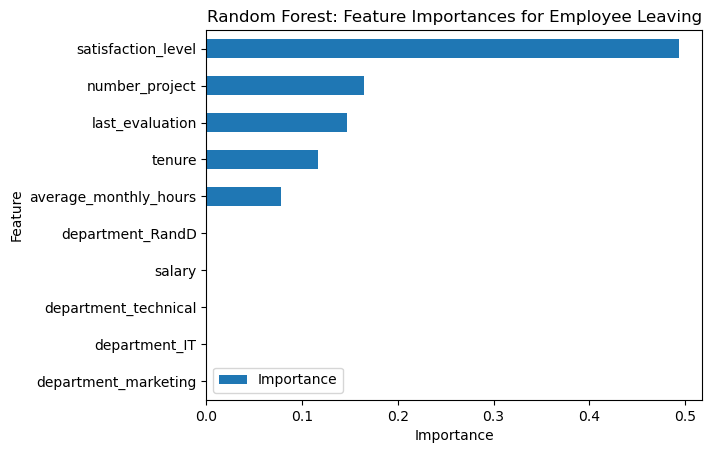

In [411]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

We can see that satisfaction level is the biggest factor on whether or not an employee leaves.

#### XGBoost

In [98]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state = 0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [100]:
%%time 
xgb1.fit(X_train, y_train)

CPU times: user 11.4 s, sys: 92 ms, total: 11.5 s
Wall time: 3.36 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [102]:
# Examine best score
xgb1.best_score_

0.9432353703036109

In [104]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [182]:
def xgb_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [178]:
# Call 'make_results()' on the GridSearch object
xgb1_cv_results = xgb_results('XGB CV', xgb1, 'f1')
results = pd.concat([rf1_train_scores, xgb1_cv_results], axis=0)
results

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.956159,0.920295,0.937884,0.979762,0.955947
0,XGB CV,0.975674,0.912935,0.943235,0.981764,NaN


XGBoost seems to permform better than the Random Forest.

In [222]:
# Get scores on test data
xgb_test_scores = get_scores('XGB test', xgb1, X_test, y_test)
results = pd.concat([logreg_results, tree1_cv_results, rf1_test_scores, xgb_test_scores], axis=0)
results

,model,precision,recall,f1,accuracy,auc
0,logistic regression,0.442708,0.170683,0.246377,0.826551,0.563941
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439
0,XGB test,0.968288,0.919679,0.943357,0.981654,0.956839


XGBoost outperforms the Random Forest classifier. Therefore, XGBoost is our champion model.

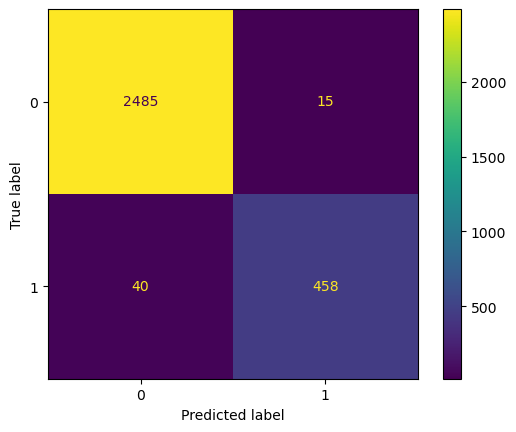

In [148]:
# Get scores on test data
xgb_preds = xgb1.best_estimator_.predict(X_test)

# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb1.classes_, 
                             )
disp.plot(values_format='');

From this, we can say that the most common error that the model will make is to classify a leaving employee as staying.

Identify the variable the most significant factor that determines whether an employee leaves. 

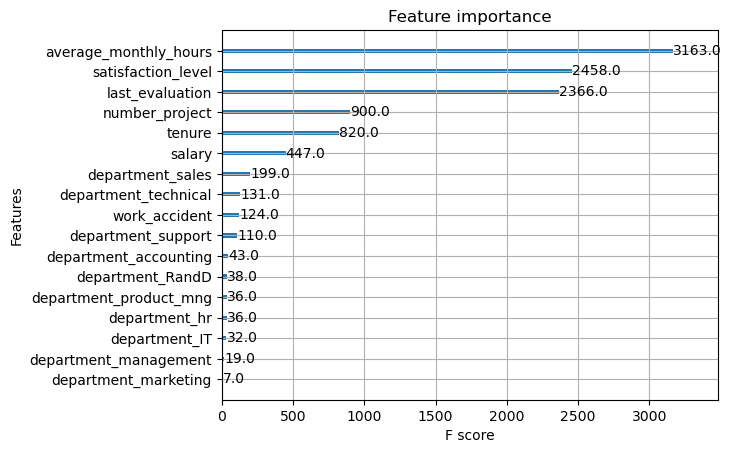

In [155]:
# Plot the relative feature importance of the predictor variables in your model.
plot_importance(xgb1.best_estimator_);

By a wide margin, we can see that the working hours is the most important feature of the model. It is followed by satisfaction level and last evaluation.

## Conclusion and Recommendations

1. **Model Performance:** XGBoost emerged as the champion model, outperforming other models by a significant margin. Its superior predictive power makes it the preferred choice for employee retention analysis.

2. **Feature Importance:** Working hours emerged as the most influential feature in predicting employee turnover, followed closely by satisfaction level and last evaluation. This suggests that overwork may be a significant factor contributing to employee dissatisfaction and turnover.

3. **Workload Concerns:** The models and feature importances reinforce the notion that employees are overworked at the company. This overwork may be a key driver of dissatisfaction and could potentially lead to higher turnover rates.

**Recommendations:**

1. **Cap Working Hours:** Implement a cap on the number of projects employees can work on simultaneously to prevent overwork and burnout.

2. **Promotions and Tenure:** Consider promoting employees who have been with the company for at least four years. Alternatively, conduct further investigation to understand why employees with four-year tenures are particularly dissatisfied.

3. **Rewards for Work-Life Balance:** Introduce incentives or rewards for employees who maintain a healthy work-life balance. This could include rewarding employees for not working excessive hours or providing additional benefits for taking time off.

4. **Clarity on Policies:** Ensure that employees are familiar with the company's overtime pay policies and expectations around workload and time off. Clearly communicate these policies to avoid misunderstandings.

5. **Culture Discussions:** Hold company-wide and team-specific discussions to understand and address the underlying work culture issues contributing to overwork and dissatisfaction. Encourage open communication and feedback from employees.

6. **Evaluation Criteria:** Review the evaluation criteria to ensure that high scores are not solely reserved for employees who work long hours. Consider implementing a more balanced approach that rewards employees based on their overall contributions and effort, rather than just hours worked.

By implementing these recommendations, the company can create a more supportive and sustainable work environment, leading to improved employee satisfaction, retention, and overall organizational success.